## Calculation of GDRegressor
## Finding both the variables m and

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score

In [5]:
X, y = make_regression(n_samples = 100, n_features = 1, n_informative = 1, n_targets = 1, noise = 30, random_state = 32)

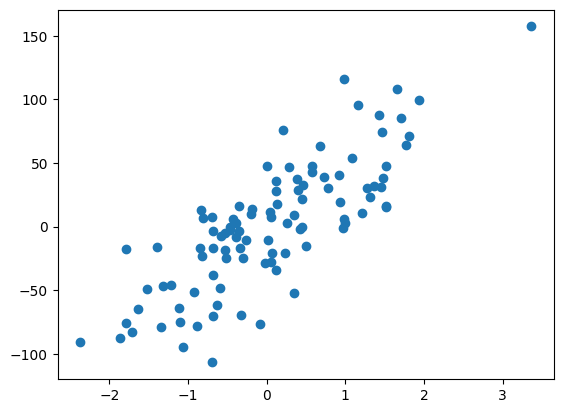

In [6]:
plt.scatter(X, y)

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 2, test_size = 0.2)

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
lr = LinearRegression()

In [43]:
lr.fit(X_train, y_train)
print('m :',lr.coef_)
print('b :', lr.intercept_)

m : [39.4072114]
b : -0.7764430910323998


In [47]:
y_pred = lr.predict(X_test)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(r2)

0.6524483919408153


In [33]:
class GDRegressor:

    def __init__(self, learning_rate, epochs):
        self.m = 100
        self.b = -120
        self.lr = learning_rate
        self.epochs = epochs

    def fit(self, X, y):
        #calculate the b using GD
        for i in range(self.epochs):
            loss_slope_b = -2 * np.sum(y- self.m * X.ravel() - self.b)
            loss_slope_m = -2 * np.sum((y- self.m * X.ravel() - self.b) * X.ravel())
            self.b = self.b - (self.lr * loss_slope_b)
            self.m = self.m - (self.lr * loss_slope_m)
        print(self.m , self.b)

    def predict(self, X):
        return self.m * X + self.b

In [34]:
gd = GDRegressor(0.001, 100)

In [35]:
gd.fit(X_train, y_train)

39.71455687610192 -1.1048358226912782


In [48]:
y_pred = gd.predict(X_test)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(r2)

0.6534866038994054
